In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.coordinates as apycoords

from tqdm import tqdm
import seaborn as sns
from astroquery.vizier import Vizier

In [2]:
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True,
                          sum_stats=True, figsize=None, cmap='Blues', title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False


    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# Hunt & Reffert. 2023

In [3]:
catalog = 'J/A+A/673/A114/clusters' #Improving the open cluster census. II Hunt & Reffert-2023
query = Vizier(catalog=catalog, row_limit=-1).query_constraints()[0]
hunt = query.to_pandas()
hunt = hunt.rename(columns={'Name':'cluster','RA_ICRS': 'ra','DE_ICRS': 'dec', 'pmRA':'pmra',\
                                          'pmDE':'pmdec','Plx':'parallax','N':'n_stars'})
hunt['d'] = 1000. / hunt.parallax # pc
hunt = hunt[(hunt['d'] > 0.) & (hunt['d'] <= 7000.) & (hunt['n_stars'] > 20) & (hunt['n_stars'] < 1e4)]
hunt = hunt[['cluster','ra','dec','pmra','pmdec','r50','n_stars','parallax','d','X', 'Y', 'Z']]
hunt

,cluster,ra,dec,pmra,pmdec,r50,n_stars,parallax,d,X,Y,Z
1,ADS_16795,352.592165,58.553413,18.656604,2.846613,2.653159,41,4.759611,210.101225,-8200.949467,190.523268,11.391597
2,AH03_J0748+26.9,117.155887,-26.972679,-2.465490,3.185035,0.034106,68,0.209358,4776.504489,-9916.032137,-3551.448985,-18.194602
3,ASCC_5,14.469082,55.829174,-2.406631,-1.918818,0.054491,25,0.538197,1858.054934,-9084.803224,1435.133769,-189.847236
4,ASCC_6,26.842159,57.738607,-0.834145,0.149175,0.143602,209,0.629667,1588.140201,-9092.167569,1141.104359,-89.948355
5,ASCC_9,41.623901,57.776847,0.168758,-1.138680,0.138439,136,0.402282,2485.818777,-9824.860285,1543.568130,-44.387681
...,...,...,...,...,...,...,...,...,...,...,...,...
7162,vdBergh_85,101.720134,1.324256,-0.957545,0.395344,0.142862,105,0.539945,1852.041755,-9558.985482,-871.427459,12.454071
7163,vdBergh_92,106.036502,-11.442338,-4.385467,1.582681,0.130998,345,0.875270,1142.504037,-8908.878222,-774.710683,-23.731010
7164,vdBergh_113,272.165492,-21.441478,-0.719227,-1.422795,0.126032,163,0.653975,1529.111352,-6728.592103,223.077004,-1.064511
7165,vdBergh_130,304.517447,39.366647,-3.547601,-5.126503,0.106764,162,0.581061,1720.990477,-7743.588494,1633.393016,79.031266


# Alfonso et al. 2024

In [4]:
catalog = 'J/A+A/689/A18/clusters'
query = Vizier(catalog=catalog, row_limit=-1).query_constraints()[0]
alfonso = query.to_pandas()
del alfonso['Seq']
alfonso = alfonso.rename(columns={'Cluster':'cluster','RA_ICRS': 'ra','DE_ICRS': 'dec', 'pmRA':'pmra',\
                                          'pmDE':'pmdec','Plx':'parallax','Nstars':'n_stars'})
alfonso['d'] = 1000. / alfonso.parallax # pc
alfonso

,cluster,n_stars,ra,dec,pmra,pmdec,parallax,logAge,Z,AV,MOD,SimbadName,_RA.icrs,_DE.icrs,d
0,ASCC_10,129,51.784163,34.847093,-1.815788,-1.470294,1.450102,8.565278,0.108537,0.629316,9.100323,[KPR2005] 10,51.784173,34.847100,689.606758
1,ASCC_101,154,288.411534,36.347332,0.978043,1.234214,2.482804,8.441943,0.004296,0.189840,8.079734,[KPR2005] 101,288.411529,36.347327,402.770424
2,ASCC_105,181,295.589353,27.492885,1.396109,-1.626063,1.755620,7.891654,0.050715,0.409259,8.770193,[KPR2005] 105,295.589346,27.492893,569.599476
3,ASCC_107,63,297.170843,21.961661,-0.222547,-5.136115,1.094851,7.196614,0.352933,1.689755,9.700084,[KPR2005] 107,297.170844,21.961684,913.366163
4,ASCC_11,280,53.041281,44.849540,0.919247,-3.075352,1.139830,8.795452,-0.055409,0.600277,9.689326,[KPR2005] 11,53.041275,44.849554,877.324177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,UPK_93,80,300.336527,30.051700,-0.853199,-8.171879,1.350312,8.830048,-0.094012,0.319806,9.199899,UPK 93,300.336531,30.051737,740.569743
366,UPK_94,41,304.721932,27.622928,2.139057,1.012134,1.007615,7.838441,0.108727,0.979499,9.890298,UPK 94,304.721921,27.622924,992.442233
367,UPK_99,62,312.567365,25.551745,0.379925,-7.666714,1.174241,8.129055,-0.100068,0.279814,9.409968,UPK 99,312.567363,25.551779,851.613679
368,vdBergh_80,158,97.635417,-9.548216,-3.257796,0.736237,0.975644,6.995075,-0.140820,1.502164,9.803329,Cl vdB 80,97.635432,-9.548220,1024.964319


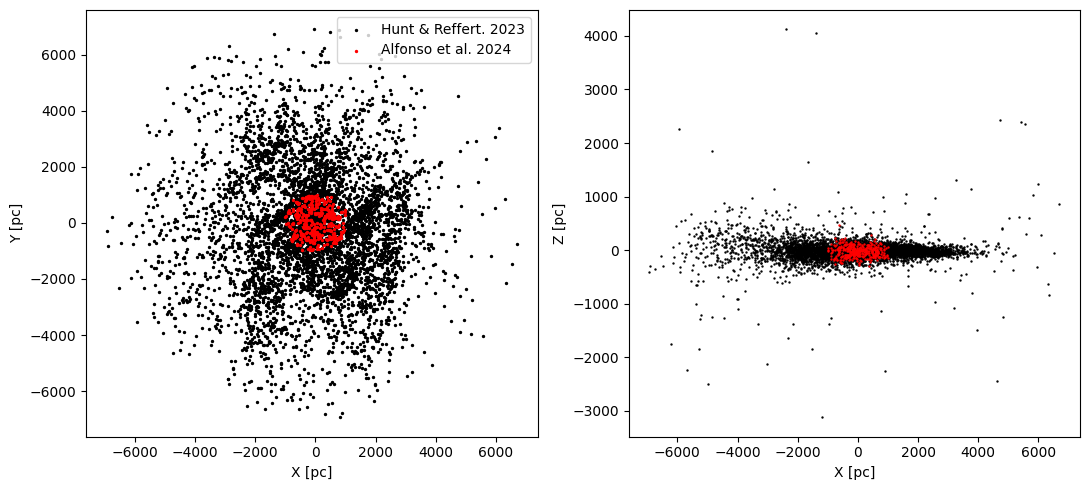

In [5]:
c_hunt = apycoords.SkyCoord(ra=hunt.ra.values *u.deg, dec=hunt.dec.values *u.deg, distance=hunt.d.values *u.pc, frame='icrs')
c_alfonso = apycoords.SkyCoord(ra=alfonso.ra.values *u.deg, dec=alfonso.dec.values *u.deg, distance=alfonso.d.values *u.pc, frame='icrs')

fig, ax = plt.subplots(1,2, figsize=(11,5))

ax[0].scatter(c_hunt.galactic.cartesian.x, c_hunt.galactic.cartesian.y, marker='o', color='k', s=2, label='Hunt & Reffert. 2023')
ax[0].scatter(c_alfonso.galactic.cartesian.x, c_alfonso.galactic.cartesian.y, marker='o', color='r', s=2, label='Alfonso et al. 2024')
ax[0].set_xlabel('X [pc]')
ax[0].set_ylabel('Y [pc]')
ax[0].legend()

ax[1].scatter(c_hunt.galactic.cartesian.x, c_hunt.galactic.cartesian.z, marker='.', s=2, color='k')
ax[1].scatter(c_alfonso.galactic.cartesian.x, c_alfonso.galactic.cartesian.z, marker='.', s=2, color='r')
ax[1].set_xlabel('X [pc]')
ax[1].set_ylabel('Z [pc]')

fig.tight_layout()
plt.show()

In [6]:
list_clusters_cmd = list(hunt.cluster.values)
len(list_clusters_cmd)

5857

In [7]:
not_cluster_found = []

for i in range(len(alfonso)):
    if not alfonso.cluster.values[i] in list_clusters_cmd:
        not_cluster_found.append(alfonso.cluster.values[i])

len(not_cluster_found)

58

In [9]:
clusters = list_clusters_cmd + not_cluster_found
len(clusters)

5915

In [10]:
clusters = np.array(clusters)
clusters

array(['ADS_16795', 'AH03_J0748+26.9', 'ASCC_5', ..., 'UPK_654', 'UPK_84',
       'UPK_99'], dtype='<U20')

In [11]:
from PIL import Image

n_cluster = 1
images_array = np.ones((2*len(clusters), 120, 120))
labels = np.zeros((2*len(clusters),), dtype=int)

n_real = 0
n_fake = 1

for c in range(len(clusters)):
    cluster_name = clusters[c]

    real_img = np.array(Image.open('./cmd/real/{}.png'.format(cluster_name)))
    real_img = real_img[np.newaxis, ...]
    images_array[n_real,:,:] = real_img

    fake_img = np.array(Image.open('./cmd/fake/fake_{}.png'.format(n_cluster)))
    fake_img = fake_img[np.newaxis, ...]
    images_array[n_fake,:,:] = fake_img
    
    if (n_real%2) == 0:
        labels[n_real] = 1

    # 0 for fake, 1 for real
    # pares: real, impares:fake
    n_real += 2
    n_fake += 2
    n_cluster += 1

images_array.shape, labels.shape

((11830, 120, 120), (11830,))

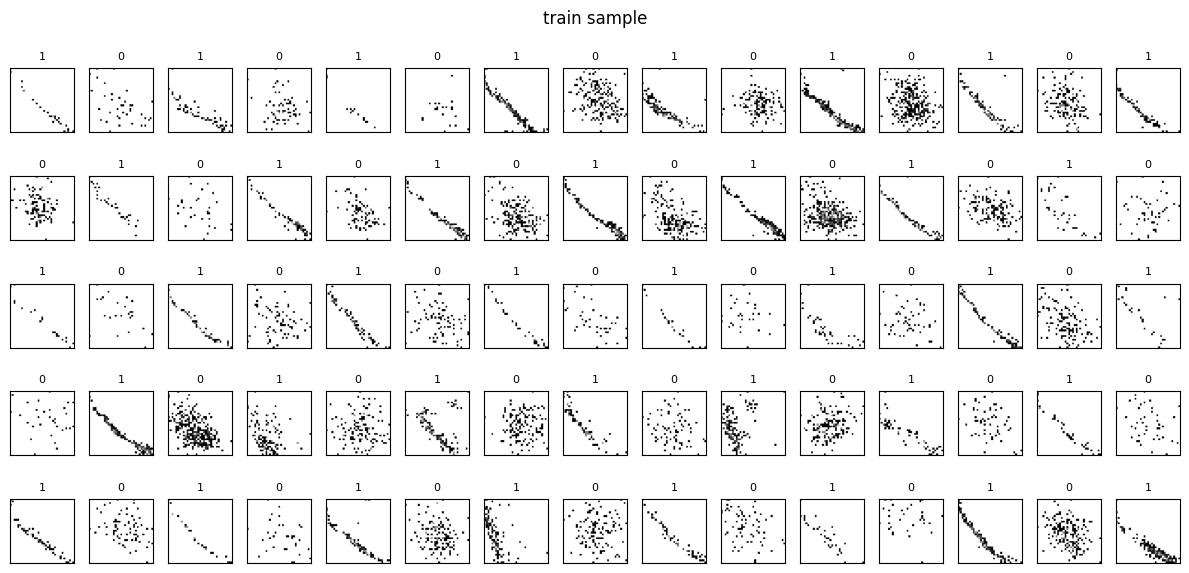

In [12]:
plt.figure(figsize=(12,6))
plt.suptitle('train sample')
for i in range(75):
    plt.subplot(5,15,i+1)
    plt.imshow(images_array[i], cmap='gray')
    plt.title(labels[i], fontsize=8)
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
plt.tight_layout()
plt.show()

## Split data in x_train and x_test

Dimensiones de los datos de Training: (9464, 120, 120) (9464,)
Dimensiones de los datos de Testing: (2366, 120, 120) (2366,)
(9464, 120, 120, 1) (2366, 120, 120, 1)
Número total de clases:  2
Clases/labels:  [0 1]


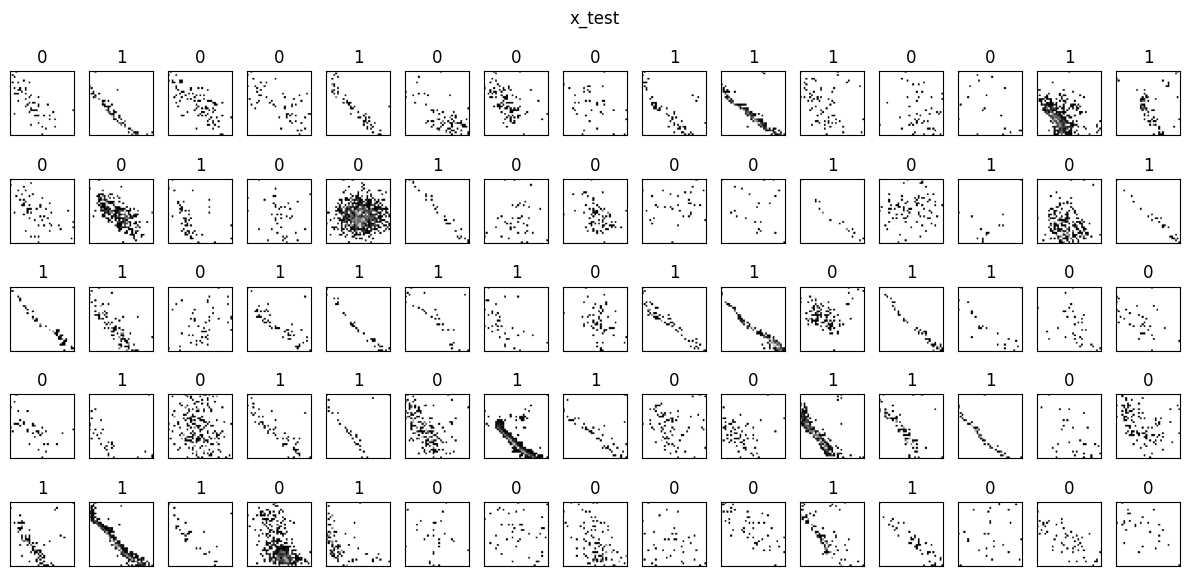

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images_array, labels, test_size=0.2, random_state=42)
print('Dimensiones de los datos de Training:', x_train.shape, y_train.shape)
print('Dimensiones de los datos de Testing:', x_test.shape, y_test.shape)

# Normalize the images
x_train_full = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train_full = x_train_full / 255.
x_test = x_test / 255.

# Reshape the images
x_train_full = np.expand_dims(x_train_full, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train_full.shape, x_test.shape)

classes = np.unique(y_train)
nClasses = len(classes)
print('Número total de clases: ', nClasses)
print('Clases/labels: ', classes)

plt.figure(figsize=(12,6))
plt.suptitle('x_test')
for i in range(75):
    plt.subplot(5,15,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(y_test[i])
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
plt.tight_layout()
plt.show()

In [32]:
#tensorflow.keras.backend.clear_session()

## Convolutional Neural Network

In [14]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
# image_rows = x_train.shape[1] 
# image_cols = x_train.shape[2]

# cmd_model = Sequential([
#     Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(image_rows, image_cols, 1), padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='same'),

#     Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='same'),
#     Dropout(0.2),

#     Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='same'),
#     Dropout(0.2),

#     Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='same'),
#     Dropout(0.2),

#     Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='same'),
#     Dropout(0.2),
    
#     Flatten(),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# metrics = ['accuracy', tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()]

# cmd_model.compile(loss='binary_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(), metrics=metrics)
# cmd_model.summary()

In [15]:
image_rows = x_train.shape[1] 
image_cols = x_train.shape[2]

def objective(trial):
    filters_1 = trial.suggest_categorical('filters_1', [32, 64])
    filters_2 = trial.suggest_categorical('filters_2', [32, 64])
    dense_units = trial.suggest_categorical('dense_units', [16, 32])
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.2)
    #learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    model = Sequential([
        Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(image_rows, image_cols, 1), padding='same'),
        MaxPooling2D(pool_size=(2,2), padding='same'),

        Conv2D(filters_1, kernel_size=(3,3), activation='relu', input_shape=(image_rows, image_cols, 1), padding='same'),
        MaxPooling2D(pool_size=(2,2), padding='same'),

        Conv2D(filters_2, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Dropout(dropout_rate),

        Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2), padding='same'),
        Dropout(0.2),

        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    #model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy', Precision(), Recall()])
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy', Precision(), Recall()])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=100,
        batch_size=200,
        steps_per_epoch=10,
        verbose=0,
        callbacks=[early_stopping]
    )

    val_acc = max(history.history['val_accuracy'])  
    return val_acc  

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

[I 2025-03-30 18:56:38,381] A new study created in memory with name: no-name-d4f38e7e-7676-49c3-a684-cf7d99192539
[I 2025-03-30 18:59:06,935] Trial 0 finished with value: 0.5591716170310974 and parameters: {'filters_1': 32, 'filters_2': 32, 'dense_units': 16, 'dropout_rate': 0.14427582458322477}. Best is trial 0 with value: 0.5591716170310974.
[I 2025-03-30 19:01:41,965] Trial 1 finished with value: 0.9002535939216614 and parameters: {'filters_1': 32, 'filters_2': 64, 'dense_units': 32, 'dropout_rate': 0.15776652447276918}. Best is trial 1 with value: 0.9002535939216614.
[I 2025-03-30 19:03:56,391] Trial 2 finished with value: 0.5109890103340149 and parameters: {'filters_1': 64, 'filters_2': 64, 'dense_units': 16, 'dropout_rate': 0.11940022705234565}. Best is trial 1 with value: 0.9002535939216614.
[I 2025-03-30 19:04:41,044] Trial 3 finished with value: 0.5118343234062195 and parameters: {'filters_1': 64, 'filters_2': 64, 'dense_units': 16, 'dropout_rate': 0.1879634557778625}. Best is

In [16]:
print(f"Best trial: {study.best_params}")
print(f"Best metric: {study.best_value}")

Best trial: {'filters_1': 32, 'filters_2': 64, 'dense_units': 32, 'dropout_rate': 0.15776652447276918}
Best metric: 0.9002535939216614


In [17]:
best_params = study.best_params

filters_1 = best_params['filters_1']
filters_2 = best_params['filters_2']
dense_units = best_params['dense_units']
dropout_rate = best_params['dropout_rate']

best_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(image_rows, image_cols, 1), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),

    Conv2D(filters_1, kernel_size=(3,3), activation='relu', input_shape=(image_rows, image_cols, 1), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),

    Conv2D(filters_2, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Dropout(dropout_rate),

    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Dropout(0.2),

    Flatten(),
    Dense(dense_units, activation='relu'),
    Dense(1, activation='sigmoid')
])

best_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy', Precision(), Recall()])
best_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 120, 120, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 15, 15, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,129 (438.00 KB)

 Trainable params: 112,129 (438.00 KB)

 Non-trainable params: 0 (0.00 B)

# train best model

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = best_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=200, steps_per_epoch=10, verbose=1, callbacks=[early_stopping])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 659ms/step - accuracy: 0.4755 - loss: 3.1607 - precision_5: 0.4537 - recall_5: 0.4296 - val_accuracy: 0.6433 - val_loss: 0.6931 - val_precision_5: 0.6911 - val_recall_5: 0.5459
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 652ms/step - accuracy: 0.4958 - loss: 0.7058 - precision_5: 0.6435 - recall_5: 0.2596 - val_accuracy: 0.5110 - val_loss: 0.6931 - val_precision_5: 0.5110 - val_recall_5: 1.0000
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 637ms/step - accuracy: 0.5532 - loss: 0.6833 - precision_5: 0.5372 - recall_5: 0.9049 - val_accuracy: 0.5385 - val_loss: 0.6928 - val_precision_5: 0.5255 - val_recall_5: 0.9967
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 648ms/step - accuracy: 0.6784 - loss: 0.6125 - precision_5: 0.6658 - recall_5: 0.6897 - val_accuracy: 0.7629 - val_loss: 0.6898 - val_precision_5: 0.6998 - val_recall_5: 0.9388
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 498ms/step - accuracy: 0.7995 - loss: 0.4802 - precision_5: 0.7881 - recall_5: 0.8

In [19]:
best_model.save_weights('./best_model.weights.h5')
best_model.load_weights('./best_model.weights.h5')

In [21]:
test_eval = best_model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9065 - loss: 0.6812 - precision_5: 0.8789 - recall_5: 0.9445
Test loss: 0.6810779571533203
Test accuracy: 0.9087066650390625


## Predictions on x_test

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


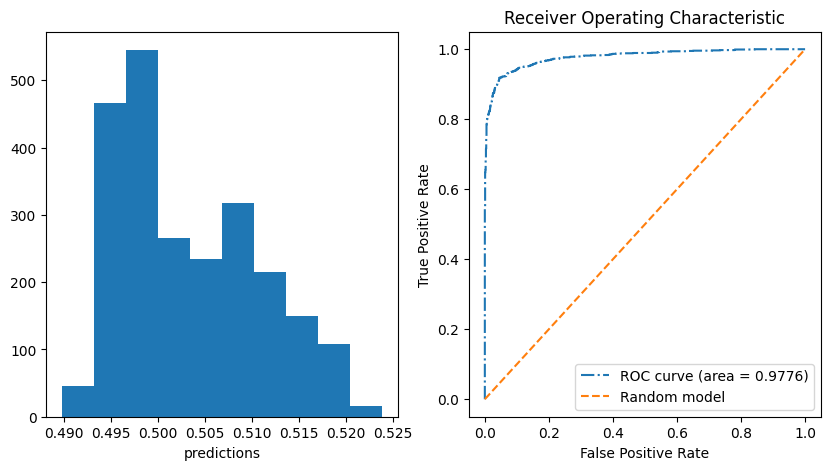

CNN found 1157 correct labels.
CNN found 1209 incorrect labels.


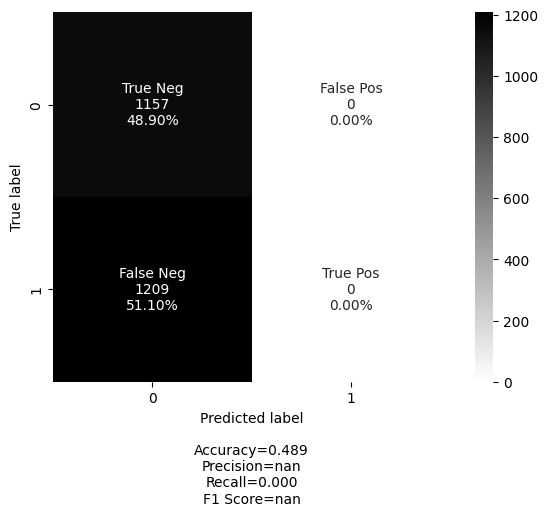

In [22]:
from sklearn.metrics import roc_curve, auc

predictions = best_model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(predictions)
plt.xlabel('predictions')

plt.subplot(1,2,2)
plt.plot(fpr, tpr, ls='-.', label='ROC curve (area = %0.4f)'%roc_auc)
plt.plot([0,1], [0,1], label='Random model', ls='--')
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


y_pred = np.zeros_like(y_test)
correct_list = []
wrong_list = []
correct = 0

threshold = 0.9
for i in range(len(predictions)):
    if predictions[i] >= threshold:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

    if y_pred[i] == y_test[i]:
        correct += 1
        correct_list.append(i)
    else:
        wrong_list.append(i)

print('CNN found %s correct labels.' %correct)
print('CNN found %s incorrect labels.' %(len (x_test) - correct))

from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(predictions, y_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['0','1']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary')
plt.show()

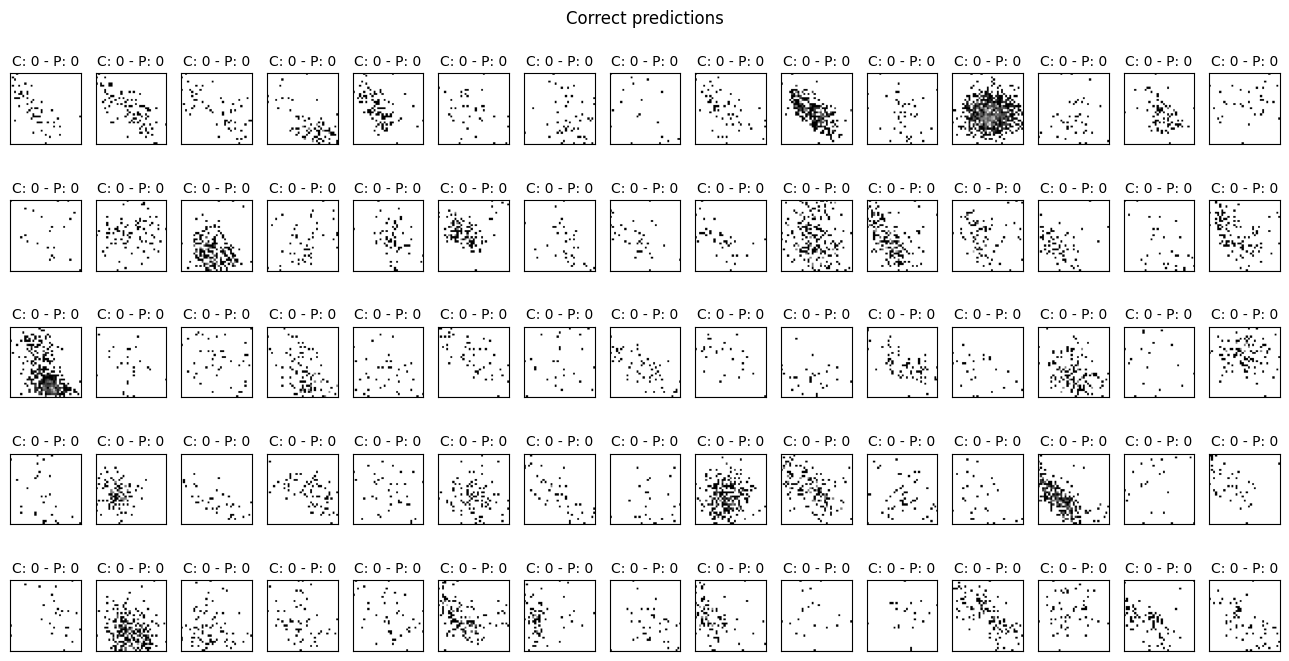

In [23]:
plt.figure(figsize=(13,7))
plt.suptitle('Correct predictions')
for i in range(75):
    plt.subplot(5,15,i+1)
    plt.imshow(x_test[correct_list[i]], cmap='gray')
    plt.title('C: %s - P: %s' %(y_test[correct_list[i]], y_pred[correct_list[i]]), fontsize=10)
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
plt.tight_layout()
plt.show()

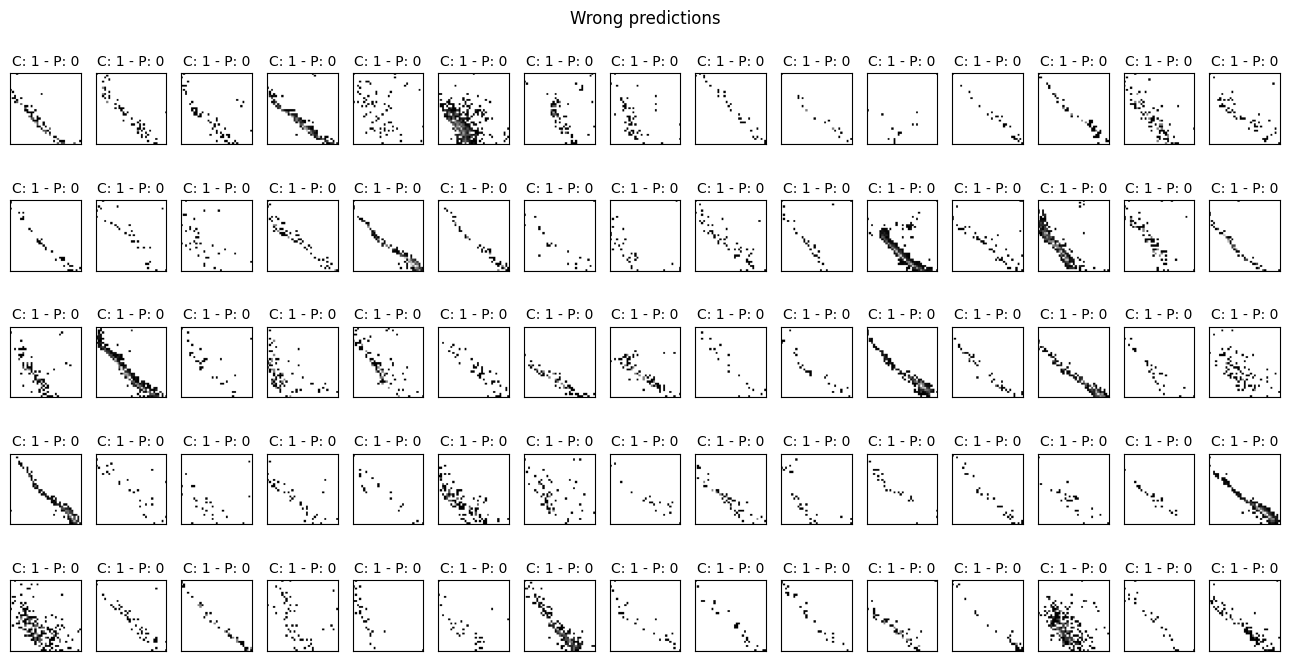

In [24]:
plt.figure(figsize=(13,7))
plt.suptitle('Wrong predictions')
for i in range(75):
    plt.subplot(5,15,i+1)
    plt.imshow(x_test[wrong_list[i]], cmap='gray')
    plt.title('C: %s - P: %s' %(y_test[wrong_list[i]], y_pred[wrong_list[i]]), fontsize=10)
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
plt.tight_layout()
plt.show()

## Capture images from clusters found by HDBSCAN 

In [18]:
# convert quadrant images to be predicted by the model
import os
#import glob

quadrant = 1
path_to_clusters = '../data_new_clusters/shell1/clusters{}/'.format(quadrant)
clusters_list = os.listdir(path_to_clusters)
image_raw_clusters = np.ones((len(clusters_list), 60, 60))

# delete_images = False
# if delete_images:
#     file_paths = glob.glob(os.path.join('./cmd/Q{}/'.format(quadrant), '*.png'))
#     for file_path in file_paths:
#         os.remove(file_path)

get_cluster_cmds = False
for i in range(len(clusters_list)):
    cluster = pd.read_csv(os.path.join(path_to_clusters, clusters_list[i]))
    color_ = cluster['phot_bp_mean_mag'] - cluster['phot_rp_mean_mag']
    g_mag = cluster['phot_g_mean_mag']
    my_dpi = plt.rcParams['figure.dpi']
    px = 1 / my_dpi

    if get_cluster_cmds:
        fig_cluster = plt.figure(figsize=((n_pixel-1) * px, n_pixel * px), frameon=False)
        plt.scatter(color_, g_mag, marker='s', s=s, c="k")
        plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
        plt.gca().invert_yaxis()
        plt.savefig('./cmd/Q{}/{}.png'.format(quadrant, clusters_list[i]), dpi=my_dpi, bbox_inches='tight', pad_inches=0)
        plt.close(fig_cluster)
        Image.open('./cmd/Q{}/{}.png'.format(quadrant, clusters_list[i])).convert('L').save('./cmd/Q{}/{}.png'.format(quadrant, clusters_list[i]))

    cluster_img = np.array(Image.open('./cmd/Q{}/{}.png'.format(quadrant, clusters_list[i])))
    cluster_img = cluster_img[np.newaxis, ...]
    image_raw_clusters[i,:,:] = cluster_img

image_raw_clusters.shape

(1738, 60, 60)

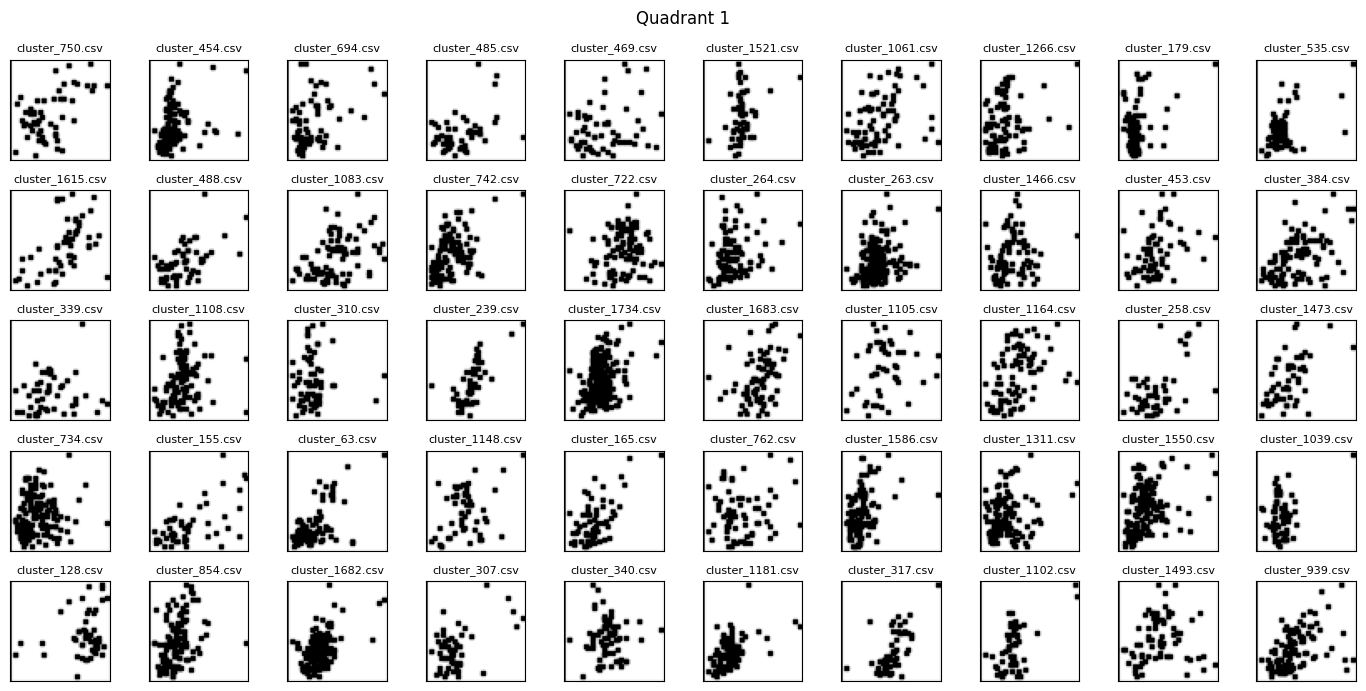

In [19]:
plt.figure(figsize=(14,7))
plt.suptitle('Quadrant %s' %quadrant)
n = 50
for i in range(n):
    plt.subplot(int(n/10),10,i+1)
    plt.imshow(image_raw_clusters[i], cmap='gray')
    plt.title(clusters_list[i], fontsize=8)
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
plt.tight_layout()
plt.show()

## Convert images that can be read by CNN

(1738, 60, 60, 1)
55/55 [==============================] - 1s 16ms/step
Total cluster images 1738.
CNN found 415 real clusters.
CNN found 1323 fake clusters.


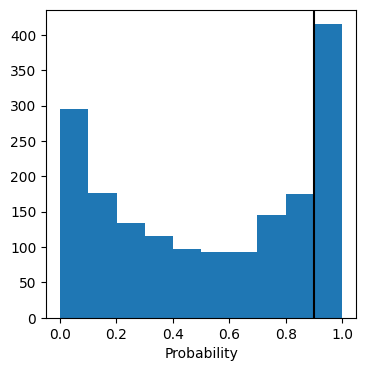

In [23]:
# normalize cluster images
image_clusters = image_raw_clusters.astype('float32')
image_clusters = image_clusters / 255.

image_clusters = np.expand_dims(image_clusters, axis=3)
print(image_clusters.shape)

# get filenames for real clusters
# 0 for fake, 1 for real
cluster_predictions = cmd_model.predict(image_clusters)
#cluster_predictions = np.argmax(cluster_predictions, axis=1)
print('Total cluster images %s.' %len(image_clusters))

list_real_clusters = []
list_fake_clusters = []
threshold = 0.9 # to decide whether or not is a real cluster

for i in range(len(cluster_predictions)):
    if cluster_predictions[i] >= threshold:
        list_real_clusters.append(clusters_list[i])
    else:
        list_fake_clusters.append(clusters_list[i])

print('CNN found %s real clusters.' %len(list_real_clusters))
print('CNN found %s fake clusters.' %len(list_fake_clusters))

#print(list_real_clusters)
#print(list_fake_clusters)

plt.figure(figsize=(4,4))
#plt.title('')
plt.hist(cluster_predictions)
plt.axvline(threshold, c='k')
plt.xlabel('Probability')
plt.show()

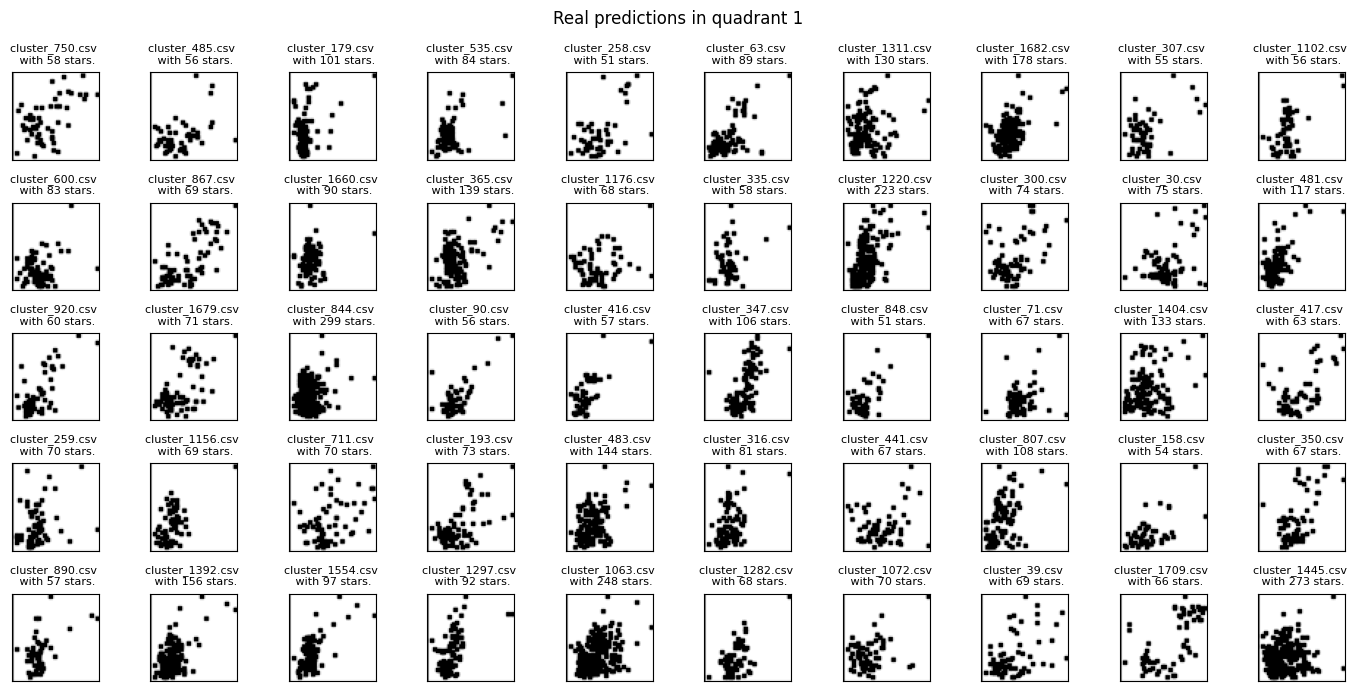

In [24]:
# plot real clusters
path_to_clusters = '../data_new_clusters/shell1/clusters{}/'.format(quadrant)

plt.figure(figsize=(14,7))
plt.suptitle('Real predictions in quadrant %s'%quadrant)
n = 50
for i in range(n):
    plt.subplot(int(n/10),10,i+1)
    cluster = pd.read_csv(os.path.join(path_to_clusters, list_real_clusters[i]))
    read_image = np.array(Image.open('./cmd/Q{}/{}.png'.format(quadrant, list_real_clusters[i])))
    plt.imshow(read_image, cmap='gray')
    plt.title('%s \n with %s stars.'%(list_real_clusters[i], len(cluster)), fontsize=8)
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
plt.tight_layout()
plt.show()

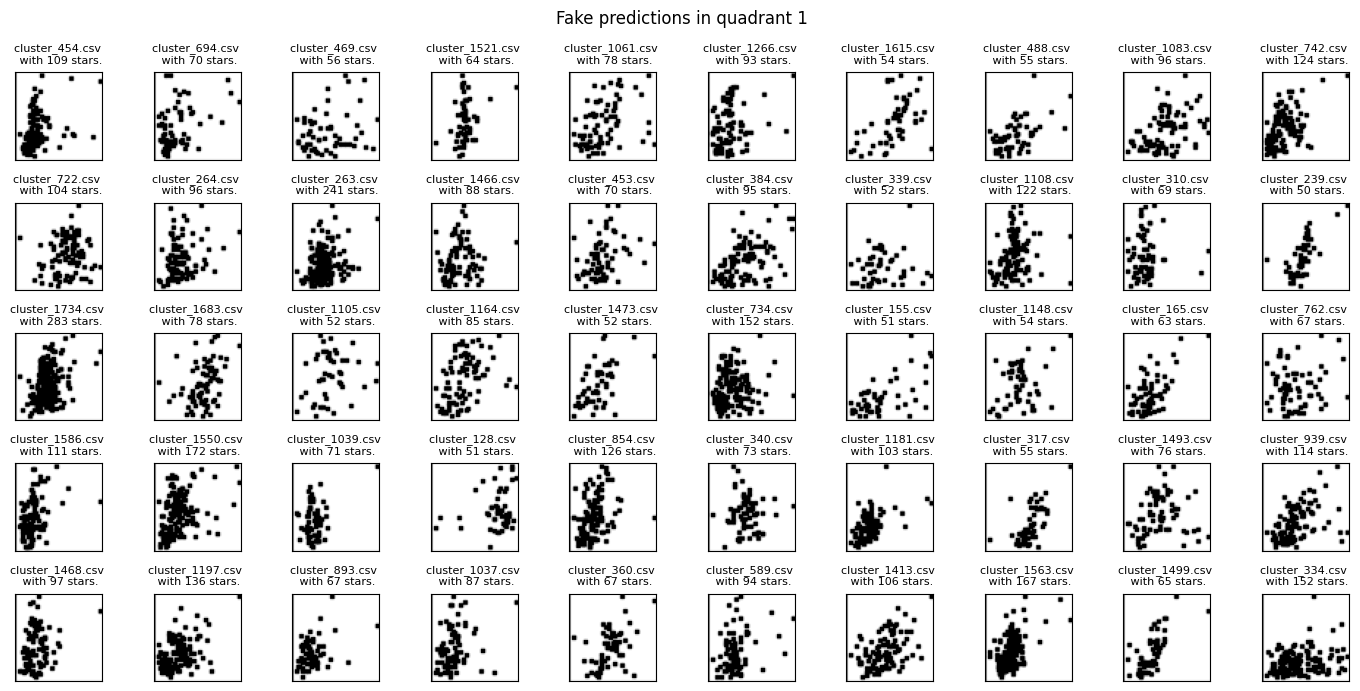

In [25]:
# plot fake clusters
path_to_clusters = '../data_new_clusters/shell1/clusters{}/'.format(quadrant)

plt.figure(figsize=(14,7))
plt.suptitle('Fake predictions in quadrant %s'%quadrant)
n = 50
for i in range(n):
    plt.subplot(int(n/10),10,i+1)
    cluster = pd.read_csv(os.path.join(path_to_clusters, list_fake_clusters[i]))
    read_image = np.array(Image.open('./cmd/Q{}/{}.png'.format(quadrant, list_fake_clusters[i])))
    plt.imshow(read_image, cmap='gray')
    plt.title('%s \n with %s stars.'%(list_fake_clusters[i], len(cluster)), fontsize=8)
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
plt.tight_layout()
plt.show()

In [35]:
####### CLUSTERS HUNT 2023 #################
from astroquery.vizier import Vizier
catalog = 'J/A+A/673/A114/clusters' #Improving the open cluster census. II Hunt & Reffert-2023
query = Vizier(catalog=catalog, row_limit=-1).query_constraints()[0]
hunt_sample = query.to_pandas()#.sort_values('DistPc')
hunt_sample = hunt_sample.fillna(0)
hunt_sample = hunt_sample.rename(columns={'Name':'cluster','RA_ICRS': 'ra','DE_ICRS': 'dec', 'pmRA':'pmra',\
                                          'pmDE':'pmdec','Plx':'parallax','N':'n_stars'})
hunt_sample['d'] = 1000. / hunt_sample.parallax
#hunt_sample = hunt_sample[(hunt_sample['d'] > 0.) & (hunt_sample['d'] <= 7000.) & (hunt_sample['n_stars'] > 20) & (hunt_sample['n_stars'] < 1e4)]
hunt_sample = hunt_sample[(hunt_sample['d'] > 0.)]
clusters = hunt_sample[['cluster','ra','dec','pmra','pmdec','r50','n_stars','parallax','d','X', 'Y', 'Z']]
clusters

,cluster,ra,dec,pmra,pmdec,r50,n_stars,parallax,d,X,Y,Z
0,1636-283,249.855743,-28.399194,-1.454902,-6.525783,0.016319,38,0.131381,7611.424017,-2248.916442,-834.329905,1276.428553
1,ADS_16795,352.592165,58.553413,18.656604,2.846613,2.653159,41,4.759611,210.101225,-8200.949467,190.523268,11.391597
2,AH03_J0748+26.9,117.155887,-26.972679,-2.465490,3.185035,0.034106,68,0.209358,4776.504489,-9916.032137,-3551.448985,-18.194602
3,ASCC_5,14.469082,55.829174,-2.406631,-1.918818,0.054491,25,0.538197,1858.054934,-9084.803224,1435.133769,-189.847236
4,ASCC_6,26.842159,57.738607,-0.834145,0.149175,0.143602,209,0.629667,1588.140201,-9092.167569,1141.104359,-89.948355
...,...,...,...,...,...,...,...,...,...,...,...,...
7162,vdBergh_85,101.720134,1.324256,-0.957545,0.395344,0.142862,105,0.539945,1852.041755,-9558.985482,-871.427459,12.454071
7163,vdBergh_92,106.036502,-11.442338,-4.385467,1.582681,0.130998,345,0.875270,1142.504037,-8908.878222,-774.710683,-23.731010
7164,vdBergh_113,272.165492,-21.441478,-0.719227,-1.422795,0.126032,163,0.653975,1529.111352,-6728.592103,223.077004,-1.064511
7165,vdBergh_130,304.517447,39.366647,-3.547601,-5.126503,0.106764,162,0.581061,1720.990477,-7743.588494,1633.393016,79.031266


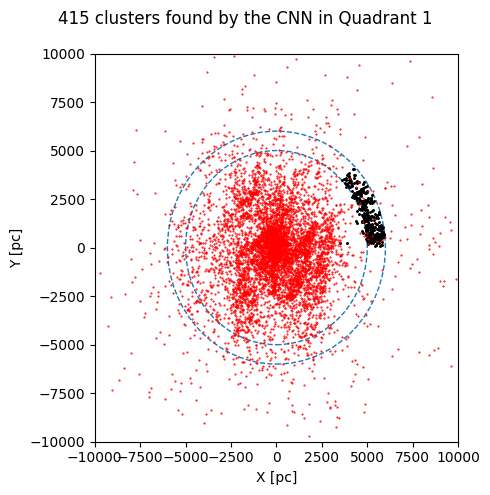

In [36]:
path_to_clusters = '../data_new_clusters/shell1/clusters{}/'.format(quadrant)
r = 10000.

fig, ax = plt.subplots(1,1, figsize=(5,5))
fig.suptitle('%s clusters found by the CNN in Quadrant %s' %(len(list_real_clusters), quadrant))
circle1 = plt.Circle((0, 0), radii1, color='C0', fill=False, lw=1, ls='--')
circle2 = plt.Circle((0, 0), radii2, color='C0', fill=False, lw=1, ls='--')
ax.add_patch(circle1)
ax.add_patch(circle2)

for i in range(len(list_real_clusters)):
    cluster = pd.read_csv(os.path.join(path_to_clusters, list_real_clusters[i]))
    ra = np.median(cluster.ra.values) *u.deg
    dec = np.median(cluster.dec.values) *u.deg
    distance = np.median(1000. / cluster.parallax) *u.pc
    c = apycoords.SkyCoord(ra=ra, dec=dec ,distance=distance, frame='icrs')
    x, y, z = c.galactic.cartesian.x, c.galactic.cartesian.y, c.galactic.cartesian.z
    ax.scatter(x, y, marker='.', s=5, color='k')

c_h = apycoords.SkyCoord(ra=clusters.ra.values *u.deg, dec=clusters.dec.values *u.deg, distance=clusters.d.values *u.pc, frame='icrs')
x_h, y_h, z_h = c_h.galactic.cartesian.x, c_h.galactic.cartesian.y, c_h.galactic.cartesian.z
ax.scatter(x_h, y_h, marker='.', s=1, color='r')
ax.set_xlim(-r, r)
ax.set_ylim(-r, r)
ax.set_xlabel('X [pc]')
ax.set_ylabel('Y [pc]')
fig.tight_layout()
plt.show()

In [33]:
len(list_real_clusters)

415

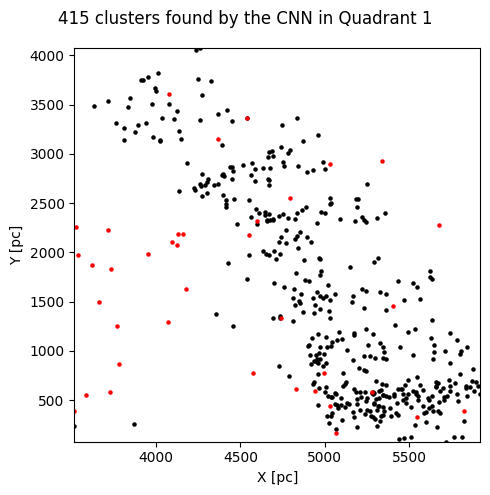

In [41]:
path_to_clusters = '../data_new_clusters/shell1/clusters{}/'.format(quadrant)

fig, ax = plt.subplots(1,1, figsize=(5,5))
fig.suptitle('%s clusters found by the CNN in Quadrant %s' %(len(list_real_clusters), quadrant))
x_ = []
y_ = []

for i in range(len(list_real_clusters)):
    cluster = pd.read_csv(os.path.join(path_to_clusters, list_real_clusters[i]))
    ra = np.median(cluster.ra.values) *u.deg
    dec = np.median(cluster.dec.values) *u.deg
    distance = np.median(1000. / cluster.parallax) *u.pc
    c = apycoords.SkyCoord(ra=ra, dec=dec ,distance=distance, frame='icrs')
    x, y, z = np.array(c.galactic.cartesian.x), np.array(c.galactic.cartesian.y), np.array(c.galactic.cartesian.z)
    ax.scatter(x, y, marker='o', s=5, color='k')
    x_.append(x)
    y_.append(y)

c_h = apycoords.SkyCoord(ra=clusters.ra.values *u.deg, dec=clusters.dec.values *u.deg, distance=clusters.d.values *u.pc, frame='icrs')
x_h, y_h, z_h = c_h.galactic.cartesian.x, c_h.galactic.cartesian.y, c_h.galactic.cartesian.z
ax.scatter(x_h, y_h, marker='o', s=5, color='r')
ax.set_xlim(min(x_), max(x_))
ax.set_ylim(min(y_), max(y_))
ax.set_xlabel('X [pc]')
ax.set_ylabel('Y [pc]')
fig.tight_layout()
plt.show()

### Find nearby clusters from Hunt et al. sample to identify whether or not a clusters is a new candidate

In [50]:
c_h = apycoords.SkyCoord(ra=clusters.ra.values *u.deg, dec=clusters.dec.values *u.deg, distance=clusters.d.values *u.pc, frame='icrs')
x_h, y_h, z_h = np.array(c_h.galactic.cartesian.x), np.array(c_h.galactic.cartesian.y), np.array(c_h.galactic.cartesian.z)

path_to_clusters = '../data_new_clusters/shell1/clusters{}/'.format(quadrant)
r_value = 80. # pc
related_clusters = {}

for i in range(len(list_real_clusters)):
    new_cluster = pd.read_csv(os.path.join(path_to_clusters, list_real_clusters[i]))
    ra_new, dec_new, distance_new = np.median(new_cluster.ra.values) *u.deg, np.median(new_cluster.dec.values) *u.deg, \
                                    1000. / np.median(new_cluster.parallax.values) *u.pc
    c_new = apycoords.SkyCoord(ra=ra_new, dec=dec_new ,distance=distance_new, frame='icrs')
    x_new, y_new, z_new = c_new.galactic.cartesian.x, c_new.galactic.cartesian.y, c_new.galactic.cartesian.z
    
    test_list = []
    for j in range(len(clusters)):

        d = np.sqrt((x_new.value - x_h[j])**2 + (y_new.value - y_h[j])**2 + (z_new.value - z_h[j])**2)
        if d <= r_value:
            print('')
            print('{} may have already been reported: {} is {:.1f} pc away.'.format(list_real_clusters[i], clusters.cluster.values[j], d))
            test_list.append(clusters.cluster.values[j])
    
    if test_list:        
        related_clusters[list_real_clusters[i]] = test_list


cluster_1375.csv may have already been reported: HSC_264 is 35.6 pc away.

cluster_22.csv may have already been reported: NGC_6218 is 6.8 pc away.

cluster_33.csv may have already been reported: NGC_6809 is 37.4 pc away.


In [52]:
related_clusters

{'cluster_1375.csv': ['HSC_264'],
 'cluster_22.csv': ['NGC_6218'],
 'cluster_33.csv': ['NGC_6809']}

cluster_1375.csv does not have common stars with HSC_264
NGC_6218: crossmatch with 104 stars.
New candidate: 116 Hunt: 7248 Crossmatch: 104


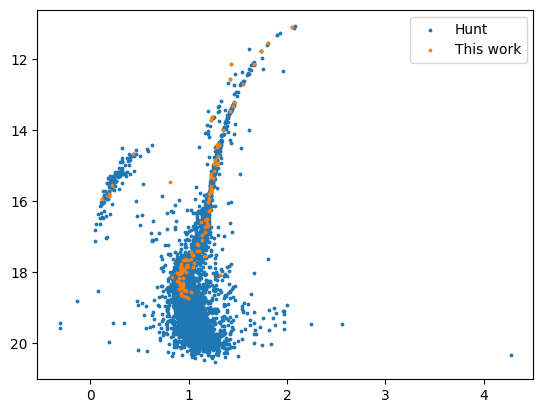

NGC_6809: crossmatch with 52 stars.
New candidate: 53 Hunt: 11103 Crossmatch: 52


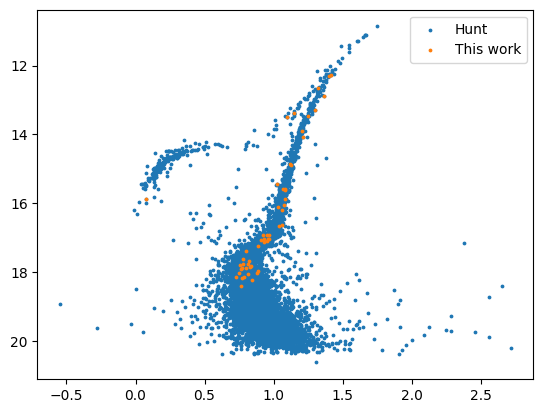

In [61]:
for index, value in enumerate(related_clusters):
    cluster_candidate = pd.read_csv(os.path.join(path_to_clusters, value))

    for i in related_clusters[value]:
        cluster_members = members_h[(members_h.cluster == i)] # Hunt 2023
        cm = pd.merge(cluster_candidate, cluster_members, on=['source_id'], how='inner')
        if len(cm) != 0:
            print('%s: crossmatch with %s stars.'%(i, len(cm)))
            print('New candidate: %s Hunt: %s Crossmatch: %s'%(len(cluster_candidate), len(cluster_members), len(cm)))

            plt.scatter(cluster_members['bp-rp'], cluster_members['phot_g_mean_mag'], label='Hunt', s=3)
            color_band = cluster_candidate['phot_bp_mean_mag'] - cluster_candidate['phot_rp_mean_mag']
            plt.scatter(color_band, cluster_candidate['phot_g_mean_mag'], label='This work', s=3)
            plt.gca().invert_yaxis()
            plt.legend()
            plt.show()
        else:
            print('%s does not have common stars with %s'%(value, i))

In [33]:
# # Look clusters with similar positions to know they have been already reported.
# from astroquery.simbad import Simbad

# path_to_clusters = '../data_new_clusters/shell1/clusters{}/'.format(quadrant)

# #r_value = 80. # pc
# r = 2 * u.arcminute
# #for i in range(len(list_real_clusters)):
# for i in range(1):
#     new_cluster = pd.read_csv(os.path.join(path_to_clusters, list_real_clusters[i]))
#     ra_new, dec_new, distance_new = np.median(new_cluster.ra.values)*u.deg, np.median(new_cluster.dec.values)*u.deg, np.median(1000./new_cluster.parallax)*u.pc
#     c_new = apycoords.SkyCoord(ra=ra_new, dec=dec_new, distance=distance_new, frame='icrs')
#     x_new, y_new, z_new = c_new.galactic.cartesian.x, c_new.galactic.cartesian.y, c_new.galactic.cartesian.z
    
#     c = apycoords.SkyCoord(ra=ra_new, dec=dec_new, frame='icrs')

#     result_table = Simbad.query_region(c, radius=r)
#     print(result_table)

In [34]:
# # Look clusters with similar positions to know they have been already reported.
# from astroquery.simbad import Simbad
# from astroquery.vizier import Vizier
# #import astropy.units as u
# #import astropy.coordinates as coord

# path_to_clusters = '../data_new_clusters/shell1/clusters{}/'.format(quadrant)

# #r_value = 80. # pc
# r = .1 * u.arcminute
# #for i in range(len(list_real_clusters)):
# new_cluster = pd.read_csv(os.path.join(path_to_clusters, list_real_clusters[0]))
# ra_new, dec_new, distance_new = np.median(new_cluster.ra.values)*u.deg, np.median(new_cluster.dec.values)*u.deg, np.median(1000./new_cluster.parallax)*u.pc
# c_new = apycoords.SkyCoord(ra=ra_new, dec=dec_new, distance=distance_new, frame='icrs')
# x_new, y_new, z_new = c_new.galactic.cartesian.x, c_new.galactic.cartesian.y, c_new.galactic.cartesian.z

# c = apycoords.SkyCoord(ra=ra_new, dec=dec_new, frame='icrs')
# result_table = Vizier.query_region(c, radius=r)
# #result_table = Simbad.query_region(c, radius=r).to_pandas()

In [35]:
# result_table#[['MAIN_ID','RA','DEC','COO_BIBCODE']]
# #result_table[['COO_BIBCODE']].values[0]

In [36]:
# apycoords.SkyCoord('{} {}'.format(result_table.as_array()[0][1], result_table.as_array()[0][2]), unit=(u.hourangle, u.deg))